In [91]:
import pandas as pd
import numpy as np
#%display typeset

## Modelo SEIR 


$$\frac{dS}{dT}=-\lambda \cdot S(t) \cdot I(t)$$

$$\frac{dE}{dT}=\lambda \cdot S(t) \cdot I(t) - \alpha \cdot E(t) $$

$$\frac{dI}{dT}=\alpha \cdot E(t) - \gamma \cdot I(t)$$

$$\frac {dR}{dT}=\gamma \cdot I(t)$$

In [80]:
def ODE (t,y,params):
    S,E,I,R = y
    lam,alfa,gama = params
    return [-lam*S*I,
            lam*S*I - alfa*E,
            alfa*E - gama*I,
            gama*I ]

In [132]:
data = pd.read_csv("owid-covid-data.csv")
data = data[data.iso_code=="FRA"]
data.reset_index(inplace=True)

In [198]:
data['total_cases']

0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
         ...   
245    281025.0
246    286007.0
247    293024.0
248    300181.0
249    309156.0
Name: total_cases, Length: 250, dtype: float64

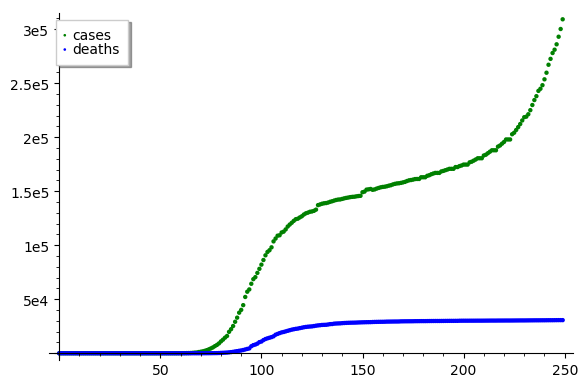

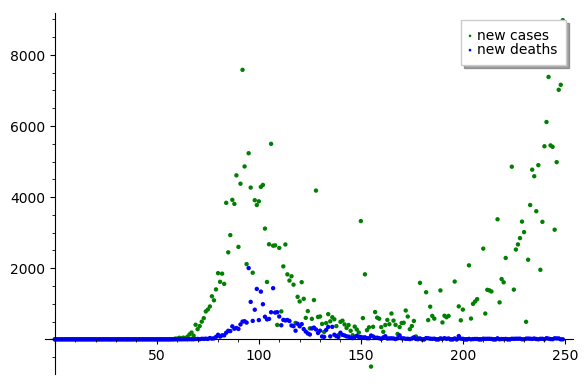

In [177]:
C = list_plot(data['total_cases'],color='green',legend_label='cases')
NC = list_plot(data['new_cases'],color = 'green',legend_label='new cases')
D = list_plot(data['total_deaths'],legend_label='deaths')
ND = list_plot(data['new_deaths'],legend_label='new deaths')
show(C+D)
show(NC+ND)

In [173]:
def get_sim_array(sol):
    sim = np.array([y for t,y in sol])
    return sim

In [237]:
T = ode_solver()
T.algorithm = "rk8pd"
T.function = ODE

def plot_results(params):
    popFRA = 67 * 10^6
    
    inits = [0.99,0,0.1,0]
    t_span=[0,len(data)]
    num_points=len(data)
    
    T.ode_solve(t_span, inits, num_points,params)
    t0=params[-1]
    sim = get_sim_array(T.solution)*10^6 ##falta ajustar,seria popFRA
    
    C = list_plot(data['total_cases'],color='green',legend_label='Cum. cases')
    D = list_plot(data['total_deaths'],color='blue', legend_label='Cum. Deaths')
    S = list_plot(sim[:,-4], color='orange',legend_label='S:sucetíveis', plotjoined=True)
    E = list_plot(sim[:,-3], color='green',legend_label='E:expostos', plotjoined=True)
    I = list_plot(sim[:,-2], color='purple',legend_label='I:infectados', plotjoined=True)
    R = list_plot(sim[:,-1], color='red',legend_label='R:recuperados e mortos', plotjoined=True)
    
    show(D+C+S+E+I+R)

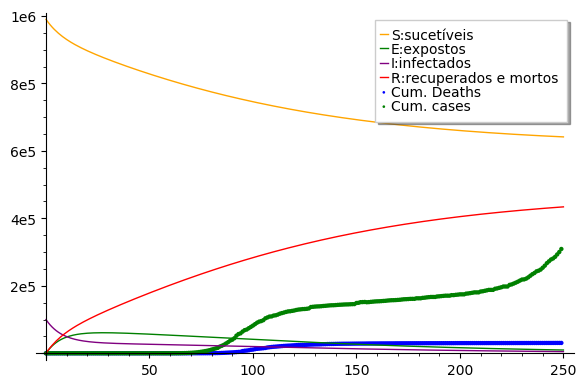

In [238]:
params=[0.09,0.04,0.09]
plot_results(params)